In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_train
import utils_annotate
import os
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Mounted at /content/drive
/content/drive/MyDrive/elsevier/Bert-NER


In [2]:
file_list = os.listdir('individual_ner/')
file_list

['10.1016j.commatsci.2023.112376.json',
 '10.1016j.flatc.2022.100446.json',
 '10.1016j.flatc.2022.100347.json',
 '10.1016j.commatsci.2021.110960.json',
 '10.1016j.apmt.2020.100685.json',
 '10.1016j.carbon.2021.10.059.json',
 '10.1016j.cpc.2020.107583.json',
 '10.1016j.commatsci.2019.109333.json',
 '10.1016j.commatsci.2023.112655.json',
 '10.1016j.commatsci.2023.112723.json',
 '10.1016j.jnucmat.2023.154794.json',
 '10.1016j.commatsci.2023.112388.json',
 '10.1016j.cartre.2023.100260.json',
 '10.1016j.jallcom.2023.169964.json',
 '10.1016j.cpc.2023.108920.json',
 '10.1016j.commatsci.2023.112526.json',
 '10.1016j.ssi.2023.116358.json',
 '10.1016j.apmt.2023.101951.json',
 '10.1016j.ssi.2023.116298.json',
 '10.1016j.ijheatmasstransfer.2023.124011.json',
 '10.1016j.commatsci.2022.111970.json',
 '10.1016j.ijheatmasstransfer.2021.121589.json',
 '10.1016j.actamat.2021.116980.json',
 '10.1016j.commatsci.2023.112656.json',
 '10.1016j.commatsci.2022.111330.json',
 '10.1016j.tsf.2021.138927.json',
 '

In [128]:
record = file_list[28]
print(record)
file = f'individual_ner/{record}'
data = utils_annotate.load_json(file)

10.1016j.commatsci.2021.110364.json


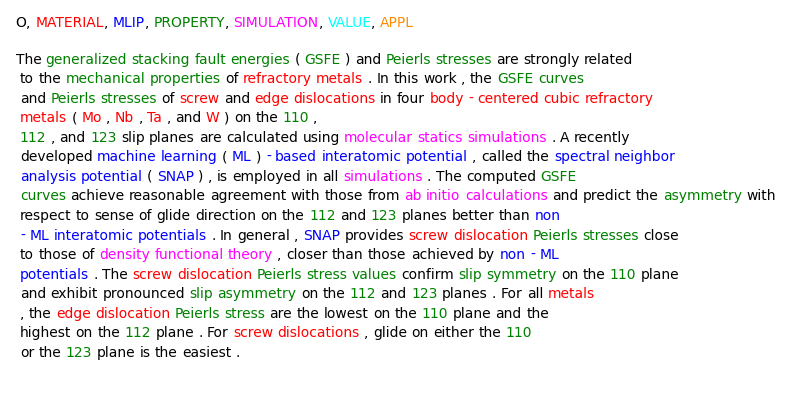

In [129]:
colors = {'O': 'black', 'MATERIAL': 'red', 'MLIP': 'blue', 'PROPERTY': 'green',
          'SIMULATION': 'magenta', 'VALUE': 'cyan', 'APPL': 'darkorange'}
word_list_marked = ['<' + w + '>' for w in data['words']]
markers = [{"color": colors[i]} for i in data['ner']]
j = 0
for i in range(len(data['words'])):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
              highlight_textprops=[{"color": c} for c in list(colors.values())], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()

In [114]:
new_rec, new_rec4check = utils_annotate.revise(file,
 [172, 173, 174], 'APPL', overwrite=True)

In [121]:
rec = utils_annotate.check(file)
rec

[(0, 'Classical', 'SIMULATION'),
 (1, 'molecular', 'SIMULATION'),
 (2, 'dynamics', 'SIMULATION'),
 (3, '(', 'O'),
 (4, 'MD', 'SIMULATION'),
 (5, ')', 'O'),
 (6, 'has', 'O'),
 (7, 'been', 'O'),
 (8, 'widely', 'O'),
 (9, 'used', 'O'),
 (10, 'to', 'O'),
 (11, 'study', 'O'),
 (12, 'atomistic', 'O'),
 (13, 'mechanisms', 'O'),
 (14, 'and', 'O'),
 (15, 'emergent', 'O'),
 (16, 'behavior', 'O'),
 (17, 'in', 'O'),
 (18, 'materials', 'O'),
 (19, 'at', 'O'),
 (20, 'length', 'O'),
 (21, 'and', 'O'),
 (22, 'time', 'O'),
 (23, 'scales', 'O'),
 (24, 'beyond', 'O'),
 (25, 'the', 'O'),
 (26, 'capabilities', 'O'),
 (27, 'of', 'O'),
 (28, 'first', 'SIMULATION'),
 (29, '-', 'SIMULATION'),
 (30, 'principles', 'SIMULATION'),
 (31, 'approaches', 'O'),
 (32, '.', 'O'),
 (33, 'The', 'O'),
 (34, 'success', 'O'),
 (35, 'of', 'O'),
 (36, 'classical', 'SIMULATION'),
 (37, 'MD', 'SIMULATION'),
 (38, 'simulations', 'SIMULATION'),
 (39, 'relies', 'O'),
 (40, 'on', 'O'),
 (41, 'the', 'O'),
 (42, 'ability', 'O'),
 (43, 

In [ ]:
word_list, categories = utils_annotate.reannotate(file, ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION'])